In [1]:
import gym
from gym import spaces
from gym.utils.env_checker import check_env
import matplotlib.pyplot as plt
import numpy as np
from bucket_env import plot_stats
%matplotlib inline

objc[84714]: Class SDLApplication is implemented in both /opt/local/lib/libSDL2-2.0.0.dylib (0x11c5907c0) and /opt/homebrew/Cellar/sdl2/2.26.2/lib/libSDL2-2.0.0.dylib (0x11cba0800). One of the two will be used. Which one is undefined.
objc[84714]: Class SDLAppDelegate is implemented in both /opt/local/lib/libSDL2-2.0.0.dylib (0x11c590810) and /opt/homebrew/Cellar/sdl2/2.26.2/lib/libSDL2-2.0.0.dylib (0x11cba0850). One of the two will be used. Which one is undefined.
objc[84714]: Class SDLTranslatorResponder is implemented in both /opt/local/lib/libSDL2-2.0.0.dylib (0x11c590888) and /opt/homebrew/Cellar/sdl2/2.26.2/lib/libSDL2-2.0.0.dylib (0x11cba08c8). One of the two will be used. Which one is undefined.
objc[84714]: Class SDLMessageBoxPresenter is implemented in both /opt/local/lib/libSDL2-2.0.0.dylib (0x11c5908b0) and /opt/homebrew/Cellar/sdl2/2.26.2/lib/libSDL2-2.0.0.dylib (0x11cba08f0). One of the two will be used. Which one is undefined.
objc[84714]: Class SDL_cocoametalview is imp

pygame 2.1.4.dev1 (SDL 2.26.0, Python 3.11.1)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
import scipy.stats as stat

In [192]:
class AllumettesEnv(gym.Env):

    def __init__(self, N=20):
        
        self.N = N 
        self.cpt_allumettes = self.N 
        self.reward = 0
        self.done = False

        self.action_space = spaces.Discrete(3)
        self.observation_space = spaces.Discrete(self.N+1)

    def step(self,action):
        
        #Joueur 1:
        removed = min(max(1,action),3)
        self.cpt_allumettes -= removed
        self.cpt_allumettes = max(self.cpt_allumettes,0)
        if  self.cpt_allumettes == 0:
            self.done = True
            self.reward = 1
            
        if not self.done:
            #Joueur 2:
            removed = np.random.randint(1,4)
            self.cpt_allumettes -= removed
            self.cpt_allumettes = max(self.cpt_allumettes,0)
            if self.cpt_allumettes == 0:
                self.done = True
                self.reward = -1

        return self.cpt_allumettes,self.reward,self.done,{}

    def render(self):
        print("Allumettes restantes : ",self.cpt_allumettes)
        for i in range(self.cpt_allumettes):
            print("|",end="")
        print("")

    def reset(self):
        self.reward = 0
        self.done = False
        self.cpt_allumettes = self.N
        return self.cpt_allumettes

    def close(self):
        pass

In [193]:
env = AllumettesEnv()
check_env(env)


In [194]:
env = AllumettesEnv()
env.reset()
env.step(2)

(16, 0, False, {})

In [195]:
def random(episodes=300):
    stats = {"Returns" : []}
    env = AllumettesEnv()
    for episode in range(1, episodes+1):
        state = env.reset()
        done = False
        ep_return = 0
        while not done:
            action = env.action_space.sample()
            next_state, reward, done, _ = env.step(action)
            state = next_state
            ep_return += reward
        stats["Returns"].append(ep_return)
    return stats


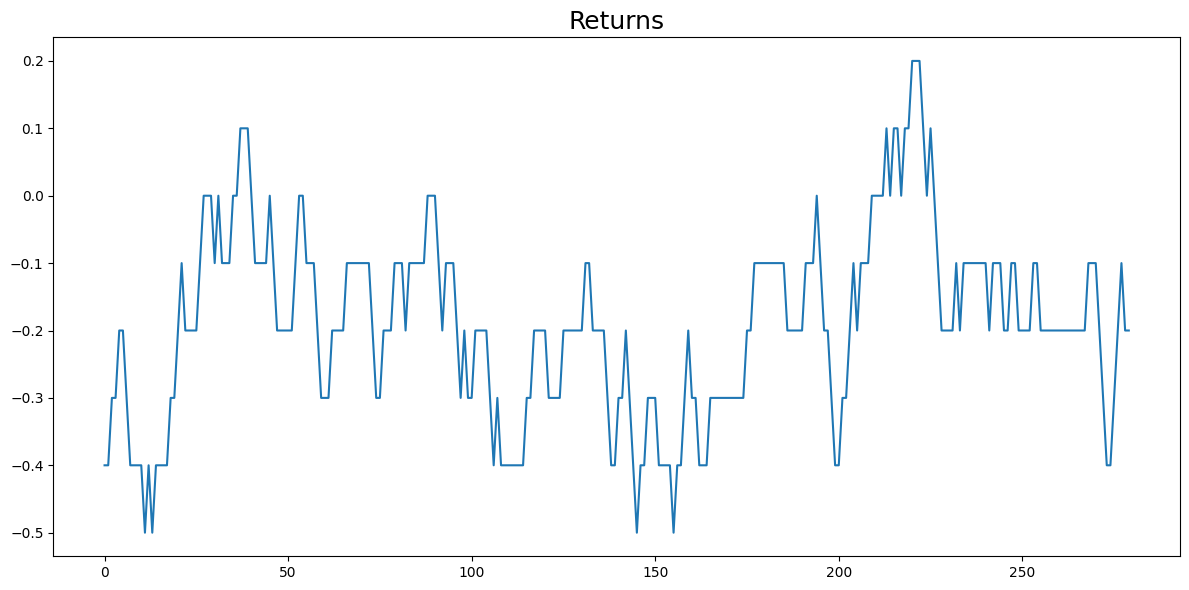

In [196]:
stats = random()
plot_stats(stats)

In [197]:
import gym
import time
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from IPython import display

from bucket_env import BucketEnv3
from bucket_env import plot_stats, testing, rendering
%matplotlib inline

In [199]:
action_values = np.zeros((env.N+1,4))

In [200]:
def target_policy(state):
    av = action_values[state]
    return np.random.choice(np.flatnonzero(av == av.max()))

In [201]:
def exploratory_policy(state):
    return np.random.randint(1,4)

In [203]:
def q_learning(exploratory_policy, target_policy, action_values,episodes, alpha=0.1, gamma=0.99):
    stats = {'Returns': []}
    for episode in tqdm(range(1, episodes+1)):
        state = env.reset()
        done = False
        ep_return = 0
        while not done:
            action = exploratory_policy(state)
            next_state, reward, done, _ = env.step(action)
            ep_return += reward
            next_action = target_policy(next_state) if not done else None
            qsa = action_values[state][action]
            next_qsa = action_values[next_state][next_action] if not done else 0.
            action_values[state][action] = qsa + alpha * (reward + gamma * next_qsa - qsa)

            state = next_state
        stats['Returns'].append(ep_return)
    return stats

100%|██████████| 10000/10000 [00:00<00:00, 16544.71it/s]


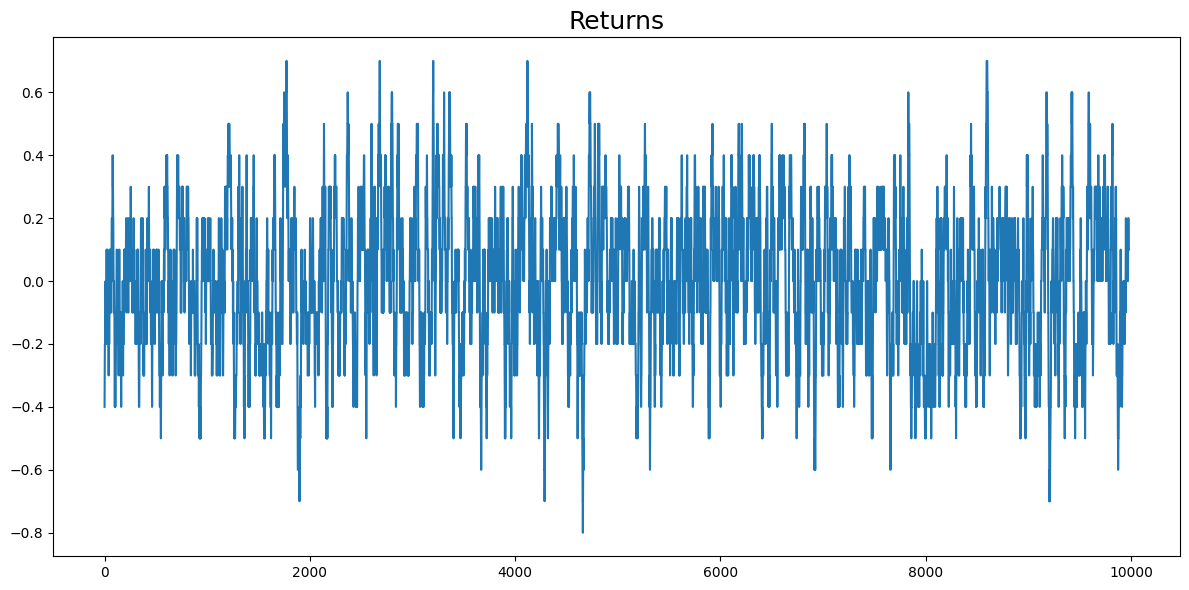

In [205]:
stats = q_learning(exploratory_policy, target_policy, action_values, episodes=10000)
plot_stats(stats)

In [240]:
testing(env,action_values)

Episode finished after 5 timesteps, earn 1
